# Ali Rostami 610302040
## series 4 of ML Training
### Question 3

## imports
در بخش اول این برنامه لایبرری‌ها و چیزهایی که لازم است از خارج از برنامه وارد شوند را قرار می‌دهیم

in this section we will import every library and outsider codes that we want to use later

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

## variables
در این بخش متغییرهای پرتکرار را تعریف کرده‌ایم تا در صورت نیاز برای تغییر در بخش‌های مختلف تنها نیاز باشد این بخش را تغییر دهیم

in this part we are going to define our variables so if we need to change anything in our program only change them from here.


In [2]:
cancer = load_breast_cancer()

X_data, y_data = cancer.data, cancer.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
n_splits= 5
n_repeats= 10
random_state= 42
components = [20, 15, 10, 5, 4, 3, 2]


perceptron = Perceptron()
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

## PCA Models
در این بخش من مدل‌های مختلف برای پی سی ای را فیت کرده‌ام و همه را نگه داشته‌ام

in this section I fitted a PCA Model for every components and saved them

In [3]:
pca_models = [PCA(n_components=c).fit(X_scaled) for c in components]
X_pca = [pca.transform(X_scaled) for pca in pca_models]

## accuracies
در این بخش دقت مدل‌های مختلف را با با کمک کراس ولیدیشن محاسبه کرده‌ام و آماده رسم نمودار جعبه‌ای شده‌است

in this section I calculated accuracies for all results of last section and we are ready for drawing box plots

In [5]:
accuracies = {comp: [] for comp in components}
for X_pc, comp in zip(X_pca, components):
    scores = cross_val_score(perceptron, X_pc, y_data, cv=cv, scoring='accuracy')
    accuracies[comp].append(scores)
accuracy_values = [np.array(accuracies[comp]).flatten() for comp in components]


## results
در نهایت میتواندی نمودارهای مختلف را ببینید ۲ مساله برای ما مهم است یکی بالا بودن دقت دو کاهش تعداد فیچرها که با توجه به ترکیب این دو مورد به نظر میرسد کاهش به ۱۰ یا ۵ میتواند برای ما مناسب‌ترین باشد

finally we can see all the box plots now we have 2 concerns about choosing the best one first is lower accuracies and second one is reducing features so by these two we can confirm that 5 or 10 components will work great for us

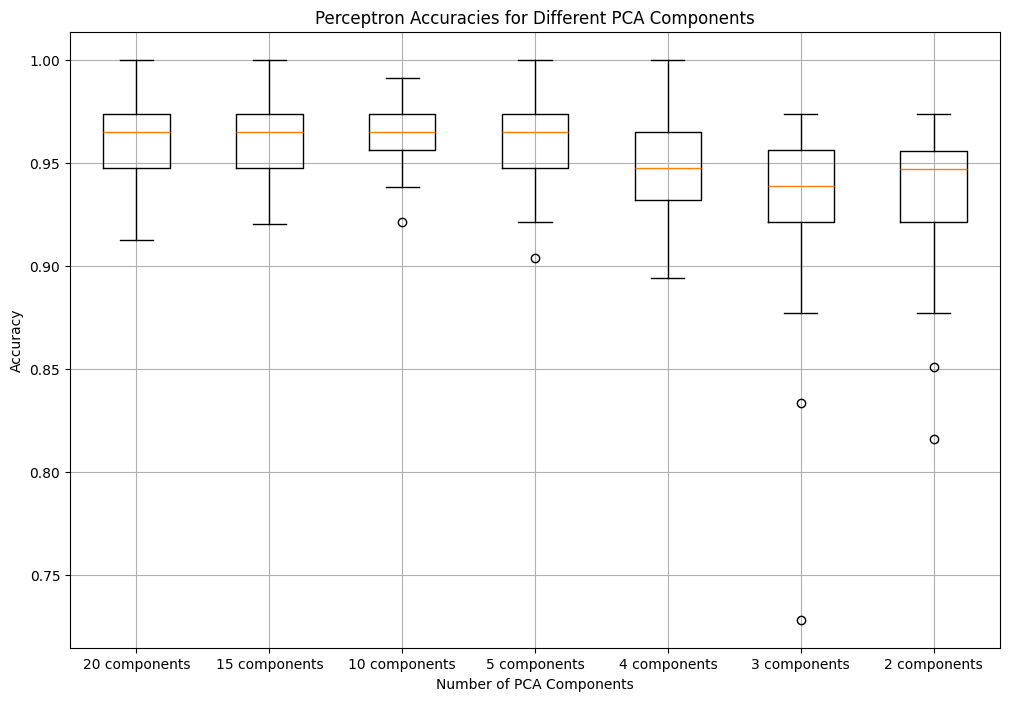

In [6]:
plt.figure(figsize=(12, 8))
plt.boxplot(accuracy_values, labels=[str(comp) + ' components' for comp in components])
plt.title('Perceptron Accuracies for Different PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()